# TC3006B
## Deep Learning
## Neural Networks Primer
<br>

#### Building a NN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Fully Connected and Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset.

- Instructions

    Understand the Guide Code: Review the provided guide code. Note how PyTorch makes it easier to implement neural networks.

    The code contains importand sections that you must understand fully, take your time, and experiment!




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/TE3002B/DeepLearning')

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt

### Download Cifar10 dataset

<img src="cifar10.png">

Checks whether a CUDA-enabled GPU is available on the machine where the code is being executed.

In [3]:
torch.cuda.is_available()

True

Sets up the data loading pipeline for the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6000 imaegs per class.

### Configurations

- Path configuration: defines where the dataset is stores
- Dataset splits: specify the number of images used for training, validation, and testing.
- Batch size: the number of samples per batch of data when loading the dataset

In [4]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/TE3002B/DeepLearning'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))

#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

100%|██████████| 170498071/170498071 [00:04<00:00, 35091774.34it/s]


Extracting /content/drive/MyDrive/Colab Notebooks/TE3002B/DeepLearning/cifar-10-python.tar.gz to /content/drive/MyDrive/Colab Notebooks/TE3002B/DeepLearning
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/drive/MyDrive/Colab Notebooks/TE3002B/DeepLearning
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [5]:
train_loader.batch_size

64

In [6]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

Streaming output truncated to the last 5000 lines.
          [-6.7008e-01, -7.1771e-01, -6.3833e-01,  ..., -4.6368e-01,
           -5.1131e-01, -6.8596e-01],
          [-4.4780e-01, -5.2719e-01, -4.0017e-01,  ..., -1.6202e-01,
           -2.4141e-01, -4.3193e-01],
          ...,
          [-3.5008e-02,  4.8893e-01,  1.0446e+00,  ...,  6.6357e-01,
            5.6831e-01,  5.6831e-01],
          [-3.2547e-03,  2.9840e-01,  7.7471e-01,  ...,  8.3822e-01,
            6.1594e-01,  4.0954e-01],
          [ 5.0480e-01,  2.9840e-01,  3.1428e-01,  ...,  6.6357e-01,
            6.4769e-01,  3.1428e-01]],

         [[ 1.7897e-01,  2.7580e-01,  3.0808e-01,  ...,  4.3718e-01,
            3.7263e-01,  2.7580e-01],
          [ 5.0173e-01,  6.6312e-01,  6.9539e-01,  ...,  7.5995e-01,
            6.9539e-01,  5.9856e-01],
          [ 6.6312e-01,  8.5677e-01,  8.7291e-01,  ...,  9.5360e-01,
            8.7291e-01,  7.4381e-01],
          ...,
          [ 1.4670e-01,  5.8243e-01,  1.0666e+00,  ...,  4.85

### Using  GPUs

In [7]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


### Showing images

Retrieves class names from a test dataset, defines a function to display images, selects a random sample from the dataset, prints its class in Spanish, normalizes the image data, and then displays the image using matplotlib.

La imagen muestreada representa un: frog


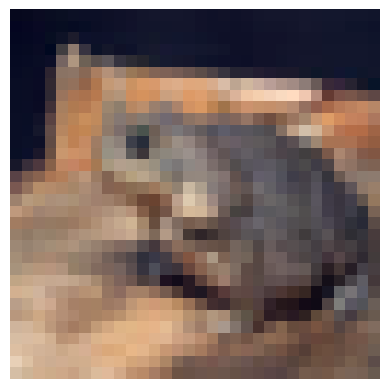

In [9]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


Creates a grid of images from the CIFAR-10 dataset. It displays 8 random samples for the 10 classes, resulting in an 8x10 grid. Each column represents a class, with the class as the title of the first image in the column..

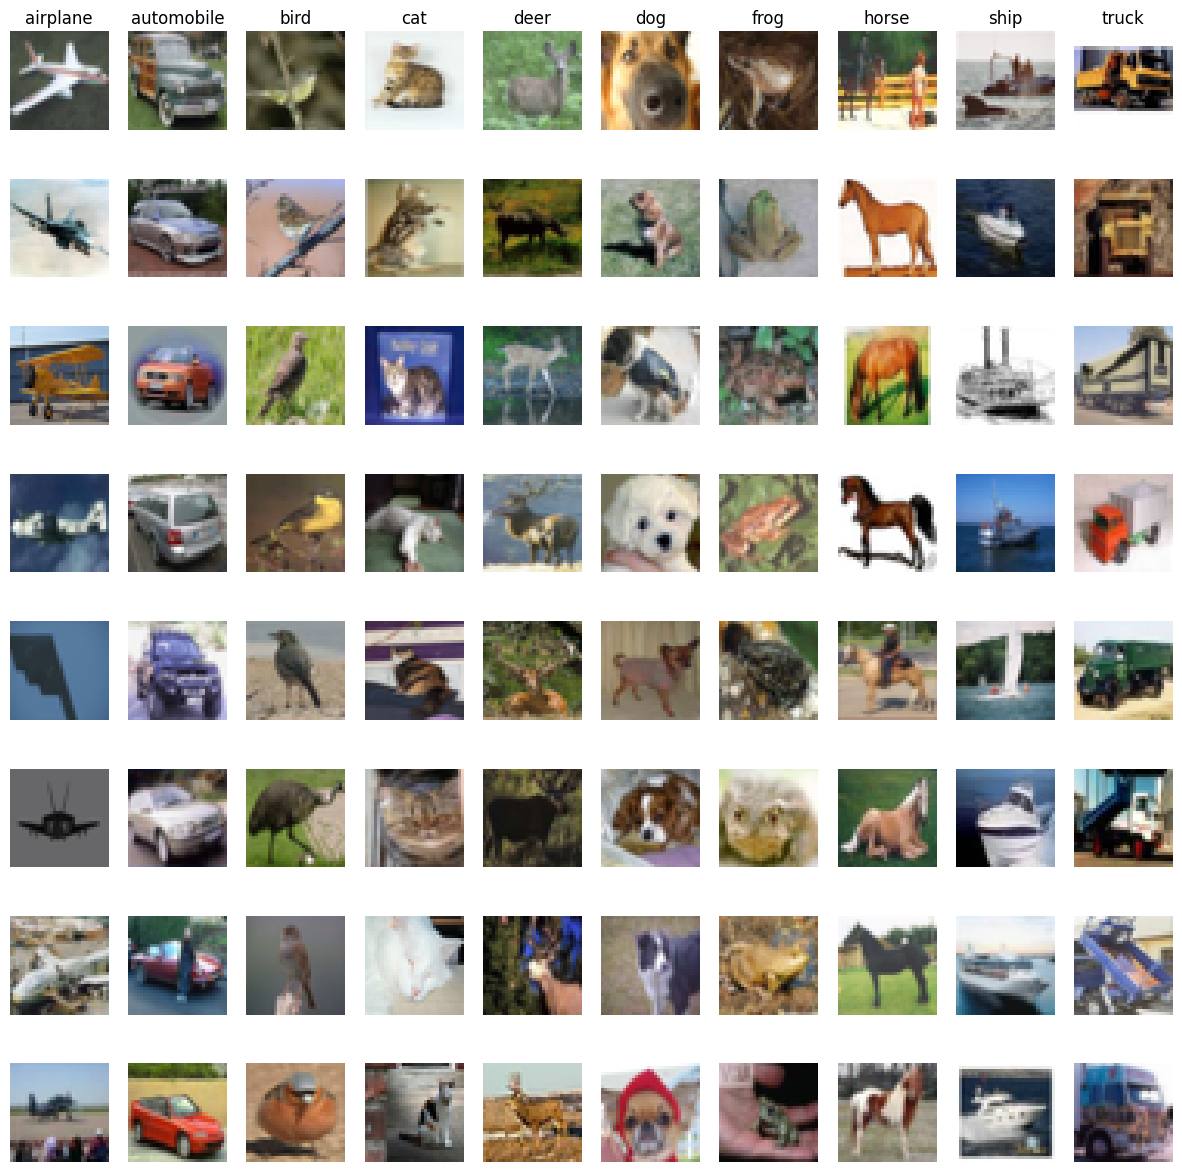

In [10]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calculating accuracy

- A loop that iterates through the `test_loader`, printing the batch index and the shapes of the input data (x) and labels (y) for each batch.
- An `accuracy` function that calculates the accuracy of a given model on a given data loader. The function uses `torch.no_grad()` to disable gradient calculations during evaluation, which saves memory and speeds up computation.


In [11]:
for i, (x,y) in enumerate(test_loader):
    print(i, x.shape, y.shape)

0 torch.Size([64, 3, 32, 32]) torch.Size([64])
1 torch.Size([64, 3, 32, 32]) torch.Size([64])
2 torch.Size([64, 3, 32, 32]) torch.Size([64])
3 torch.Size([64, 3, 32, 32]) torch.Size([64])
4 torch.Size([64, 3, 32, 32]) torch.Size([64])
5 torch.Size([64, 3, 32, 32]) torch.Size([64])
6 torch.Size([64, 3, 32, 32]) torch.Size([64])
7 torch.Size([64, 3, 32, 32]) torch.Size([64])
8 torch.Size([64, 3, 32, 32]) torch.Size([64])
9 torch.Size([64, 3, 32, 32]) torch.Size([64])
10 torch.Size([64, 3, 32, 32]) torch.Size([64])
11 torch.Size([64, 3, 32, 32]) torch.Size([64])
12 torch.Size([64, 3, 32, 32]) torch.Size([64])
13 torch.Size([64, 3, 32, 32]) torch.Size([64])
14 torch.Size([64, 3, 32, 32]) torch.Size([64])
15 torch.Size([64, 3, 32, 32]) torch.Size([64])
16 torch.Size([64, 3, 32, 32]) torch.Size([64])
17 torch.Size([64, 3, 32, 32]) torch.Size([64])
18 torch.Size([64, 3, 32, 32]) torch.Size([64])
19 torch.Size([64, 3, 32, 32]) torch.Size([64])
20 torch.Size([64, 3, 32, 32]) torch.Size([64])
21

In [12]:
def accuracy(model, loader):
    num_correct = 0
    num_total = 0
    model.eval()
    model = model.to(device=device)
    with torch.no_grad():
        for xi, yi in loader:
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi)
            _, pred = scores.max(dim=1)
            num_correct += (pred == yi).sum()
            num_total += pred.size(0)
        return float(num_correct)/num_total

### Training loop

Defines a `train` function that trains a given model using the following process:

- The function takes a model, an optimizer, and a number of epochs (default 100) as inputs.
- It moves the model to the specified device (e.g. CPU or GPU)
- For each epoch
    - It iterates through the `train_loader` dataset.
    - Moves the input data and labels to the specified device and converts them to appropiate data types
    - Computes the model's output scores for the input
    - Calculates the loss using cross-entropy between the scores and the true labels.
    - Zeros the gradient from the previous step.
    - Computes gradient through backpropagation
    - Updates the model's parameters using the optimizer.
- After processing all batches in an epoch
    - Calculates the accuracy on the validation set using the `accuracy` function
    - Prints the epoch number, the most recent batch loss, and the validation accuracy.

In [13]:
def train(model, optimiser, epochs=100):
    model = model.to(device=device)
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader):
            model.train()
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            cost = F.cross_entropy(input= scores, target=yi)
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()
        acc = accuracy(model, val_loader)
        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},')

### Linear Sequential

Set ups a neural network model and its optimizer

- It defines key hyperparameters

| name | description |
|------|-------------|
| hidden1 | Size of the first hidden input layer (256 nuerons) |
| hidden | Size of the second hidden layer (512 neurons) |
| lr | Learning rate for the optimizer (0.001) |
| epochs | Number of training epochs (3) |

- It creates a sequential neural network model (`model1`) with the following layers:
    - **flatten layer**: converts the input image (32x32x32) into a 1D vector
    - **first hidden layer**: linear layer with ReLU activation (3072 -> 256 neurons)
    - **second hidden layer**: linear layer with ReLU activation (256 -> 512 neurons)
    - **output layer**: linear layer (512 -> 10 neurons)
- It initializes an Adam optimizer for the model's parameters with the specified learning rate.

In [14]:
hidden1 = 256
hidden = 512
lr = 0.001
epochs = 3
model1 = nn.Sequential(nn.Flatten(),
                       nn.Linear(in_features=32*32*3, out_features=hidden1), nn.ReLU(),
                       nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(),
                       nn.Linear(in_features=hidden, out_features=10))
optimiser = torch.optim.Adam(model1.parameters(), lr=lr)
# optimiser = torch.optim.RMSprop(model1.parameters(), lr=l)

In [15]:
train(model1, optimiser, epochs)

Epoch: 0, costo: 1.4301338195800781, accuracy: 0.4636,
Epoch: 1, costo: 1.284637689590454, accuracy: 0.4948,
Epoch: 2, costo: 1.1093571186065674, accuracy: 0.5118,


### CNN Sequential

This CNN architecture is designed to process image data. The model mantains the spatial dimensions in the first two convolutional layers, reduces the spatial dimensions by half with max pooling, and then flattens the output for the final classification layer.

This code sets upa Convultional Neural Network (CNN) model and its optimizer:

- It defines key hyperparameters

| name | description |
|------|-------------|
| layer_1 | Number of filters in the first convultional layer (16) |
| layer_2 | Number of filters in the second convultional layer (32) |
| epochs | Number of training epochs (10) |
| num_classes | Number of output classes (10) |
| lr | learning rate for the optimizer (0.001) |

- It creates a sequential CNN model (`modelCNN1`) with the following layers:
  - First convolutional layer with 3 input channels, 16 output channels, 3x3 kernel, and padding of 1
  - ReLU activation
  - Second convolutional layer with 16 input channels, 32 output channels, 3x3 kernel, and padding of 1
  - ReLU activation function
  - Max pooling layer 2x2 pool size with stride of 2
  - Flatten layer that converts the 3D output to 1D
  - Fully connected layer mapping the flattened output to the number of classes
- It initializes an Adam optimizer for the model's parameters with the specified learning rate.

In [16]:
layer_1 = 16
layer_2 = 32
epochs = 10
num_classes = 10
lr=1e-3

modelCNN1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=layer_1,
                                    kernel_size=3, padding=1), #32x32x16
                  nn.ReLU(),
                  nn.Conv2d(in_channels=layer_1, out_channels=layer_2,
                            kernel_size=3, padding=1),#32x32x32
                  nn.ReLU(),
                  nn.MaxPool2d(2, 2), # 16x16x32
                  nn.Flatten(), # 8192, 1
                  nn.Linear(in_features= 16*16*32, out_features = num_classes))
optimiser = torch.optim.Adam(modelCNN1.parameters(), lr)

In [17]:
train(modelCNN1, optimiser, epochs)

Epoch: 0, costo: 0.5869269967079163, accuracy: 0.6272,
Epoch: 1, costo: 0.9131881594657898, accuracy: 0.664,
Epoch: 2, costo: 0.759610116481781, accuracy: 0.6704,
Epoch: 3, costo: 0.9224308729171753, accuracy: 0.6638,
Epoch: 4, costo: 0.6151016354560852, accuracy: 0.671,
Epoch: 5, costo: 0.762482225894928, accuracy: 0.6834,
Epoch: 6, costo: 0.40724462270736694, accuracy: 0.6732,
Epoch: 7, costo: 0.28387466073036194, accuracy: 0.6654,
Epoch: 8, costo: 0.35382306575775146, accuracy: 0.656,
Epoch: 9, costo: 0.48917555809020996, accuracy: 0.6564,


### OOP

Defines a custom Convolutional Neural Network (CNN) class and creates an instance of it

- The `CNN_class1` class is defined, inherining form the `nn.Module`
    - The `init` method set ups the layers:
      - Two convolutional layers (`conv1` and `conv2`)
      - A max pooling layer
      - A flatten layer
      - A linear (fully connected) layer

    - The `forward` method defines the forward pass of the network
      - Applies conv1, RelU, conv2, ReLU
      - Applies max pooling
      - Flatten the output
      - Applies the linear layer

- Model parameters are defined
    - `layer_1` number of filters in the first convolutional layer (16)
    - `layer_2` number of filters in the second convolutional layer (32)
    - `epochs` is the number of training epochs
    - `num_classes` is the number of output classes
    - `lr` is the learning rate of the network.

In [18]:
class CNN_class1(nn.Module):
    def __init__(self, layer_1, layer_2, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=layer_1,
                               kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=layer_1, out_channels=layer_2,
                               kernel_size=3, padding=1)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(in_features=16*16*layer_2, out_features=num_classes)

    def forward(self, x):
        x = F.relu(self.conv2(F.relu(self.conv1(x))))
        x = self.max_pool(x)
        x = self.flatten(x)
        return self.linear(x)

In [19]:
layer_1 = 16
layer_2 = 32
epochs = 10
num_classes = 10
lr=1e-4
modelCNN2 = CNN_class1(layer_1, layer_2, num_classes)
optimiser = torch.optim.Adam(modelCNN2.parameters(), lr)

In [20]:
train(modelCNN2, optimiser, epochs)

Epoch: 0, costo: 1.5079233646392822, accuracy: 0.4836,
Epoch: 1, costo: 1.3863497972488403, accuracy: 0.5362,
Epoch: 2, costo: 1.0990573167800903, accuracy: 0.563,
Epoch: 3, costo: 1.155807375907898, accuracy: 0.5692,
Epoch: 4, costo: 1.054451584815979, accuracy: 0.5898,
Epoch: 5, costo: 1.7806897163391113, accuracy: 0.5984,
Epoch: 6, costo: 1.0703353881835938, accuracy: 0.601,
Epoch: 7, costo: 0.7833461165428162, accuracy: 0.6128,
Epoch: 8, costo: 0.83636474609375, accuracy: 0.6244,
Epoch: 9, costo: 1.1474820375442505, accuracy: 0.6318,


### Un poco más elegante

Defines a custom Convolutional Neural Network (CNN) class and creates an instance of it

- The `CNN_class2` class is defined, inheriting from `nn.Module`
    - The `init` method sets up the layers
      - Two convolutional layers (`conv1` and `conv2`) using a custom `conv_k_3` function
      - A max pooling layer
      - A flatten layer
      - A linaer (fully connected) layer

    - The `forward` method defines the forward pass of the network
      - Applies conv1, ReLU, conv2, ReLU
      - Applies max pooling
      - Flattens the output
      - Applies the linear layer

- A lambda function `conv_k_3` is defined to create convolutional layers with kernel size 3 and padding 1.
- Model parameters are defined
    - `layer_1` is the number of filters in the first convolutional layer (16)
    - `layer_2` is the number of filters in the second convolutional layer (32)
    - `epochs` is the number of training epochs
    - `num_classes` is the number of output classes
    - `lr` is the learning rate for the optimizer

- An instance of the class is created with the specified parameters.
- An Adam optimizer is initialized for the model's parameters with the specified learning rate.

In [21]:
conv_k_3 = lambda channel1, channel2: nn.Conv2d(channel1, channel2, kernel_size=3, padding=1)

In [22]:
class CNN_class2(nn.Module):
    def __init__(self, in_channel, channel1, channel2, num_classes):
        super().__init__()
        self.conv1 = conv_k_3(in_channel, channel1)
        self.conv2 = conv_k_3(channel1, channel2)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(in_features=16*16*channel2,
                                out_features=num_classes)
    def forward(self, x):
        x = F.relu(self.conv2(F.relu(self.conv1(x))))
        x = self.max_pool(x)
        x = self.flatten(x)
        return self.linear(x)

In [23]:
layer_1 = 16
layer_2 = 32
epochs = 3
num_classes = 10
lr=1e-3
modelCNN3 = CNN_class2(3, layer_1, layer_2, num_classes)
optimiser = torch.optim.Adam(modelCNN3.parameters(), lr)

In [24]:
train(modelCNN3, optimiser, epochs)

Epoch: 0, costo: 1.3217668533325195, accuracy: 0.6158,
Epoch: 1, costo: 1.4643644094467163, accuracy: 0.6598,
Epoch: 2, costo: 1.0329713821411133, accuracy: 0.6788,


### Batch Normalization

Defines a CNN class (`CNN_BN`) with the following key features:

- Two convolutional layers with batch normalization
- ReLU activation after each batch norm layer
- Max pooling layer
- Flattening operation
- Final linear layer for classification



In [25]:
class CNN_BN(nn.Module):
    def __init__(self, in_channel, channel1,
                 channel2, num_classes):
        super().__init__()
        self.conv1 = conv_k_3(in_channel, channel1)
        self.bn1 = nn.BatchNorm2d(channel1)

        self.conv2 = conv_k_3(channel1, channel2)
        self.bn2 = nn.BatchNorm2d(channel2)

        self.max_pool = nn.MaxPool2d(2, 2)
        self.linear = nn.Linear(in_features=16*16*channel2,
                               out_features=num_classes)
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x)))))
        x = F.relu(x)
        x = self.max_pool(x)
        x = self.flatten(x)
        return self.linear(x)


In [26]:
layer_1 = 16
layer_2 = 32
epochs = 10
num_classes = 10
lr=1e-3
model_BN = CNN_BN(3, layer_1, layer_2, num_classes)
optimiser = torch.optim.Adam(model_BN.parameters(), lr)

In [27]:
train(model_BN, optimiser, epochs)

Epoch: 0, costo: 0.8892933130264282, accuracy: 0.6022,
Epoch: 1, costo: 1.130831241607666, accuracy: 0.6274,
Epoch: 2, costo: 0.9546955823898315, accuracy: 0.6708,
Epoch: 3, costo: 0.586478054523468, accuracy: 0.6662,
Epoch: 4, costo: 0.5012632608413696, accuracy: 0.6734,
Epoch: 5, costo: 0.8453195691108704, accuracy: 0.6726,
Epoch: 6, costo: 0.9271486401557922, accuracy: 0.6804,
Epoch: 7, costo: 0.9315568208694458, accuracy: 0.6684,
Epoch: 8, costo: 0.753691554069519, accuracy: 0.6726,
Epoch: 9, costo: 0.448661744594574, accuracy: 0.6694,
